# An inferential problem: The Gender Wage Gap
#### Group Members
* Luis
* Diego
* Álvaro


In [1]:
#pip install pyreadr==0.4.2

In [2]:
#Import packages
import pandas as pd
import numpy as np
import pyreadr as rr 
import math

In [3]:
#import .Rdata 
rdata_read = rr.read_r(r"../../data/wage2015_subsample_inference.Rdata")
#select data
data = rdata_read[ 'data' ]
print(data.shape)
print(type(data))

(5150, 20)
<class 'pandas.core.frame.DataFrame'>


In [4]:
#IMPORTANT: Focus on the subset of college-educated workers (scl, clg variables)

In [5]:
subset= data.copy()
subset

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
rownames,,,,,,,,,,,,,,,,,,,,
10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,0.49,0.343,0.2401,3600,11,8370,18
12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,31.0,9.61,29.791,92.3521,3050,10,5070,9
15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,3.24,5.832,10.4976,6260,19,770,4
18,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25.0,6.25,15.625,39.0625,420,1,6990,12
19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.0,4.84,10.648,23.4256,2015,6,9470,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32620,14.769231,2.692546,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,0.81,0.729,0.6561,4700,16,4970,9
32624,23.076923,3.138833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,1.44,1.728,2.0736,4110,13,8680,20
32626,38.461538,3.649659,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,1.21,1.331,1.4641,1550,4,3680,6


In [6]:
#dispense with individual with no completed nor some college education
subset = subset[subset['shs']==0]
subset = subset[subset['hsg']==0]
subset = subset[subset['ad']==0]

print('The subset contains only '+ str(subset.shape))
subset

The subset contains only (3068, 20)


,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
rownames,,,,,,,,,,,,,,,,,,,,
10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,0.49,0.343,0.2401,3600,11,8370,18
12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,31.0,9.61,29.791,92.3521,3050,10,5070,9
19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.0,4.84,10.648,23.4256,2015,6,9470,22
30,11.730769,2.462215,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.01,0.001,0.0001,1650,5,7460,14
71,19.230769,2.956512,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.16,0.064,0.0256,3255,10,8190,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32596,45.546559,3.818735,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,0.25,0.125,0.0625,3255,10,8190,18
32606,24.038462,3.179655,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,17.0,2.89,4.913,8.3521,2550,8,9480,22
32619,13.846154,2.628007,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,10.0,1.00,1.000,1.0000,800,2,770,4


In [7]:
#dispense with clg and scl columns
subset.drop(['shs','hsg','ad'], axis='columns', inplace=True)

subset

,wage,lwage,sex,scl,clg,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
rownames,,,,,,,,,,,,,,,,,
10,9.615385,2.263364,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,0.49,0.343,0.2401,3600,11,8370,18
12,48.076923,3.872802,0.0,0.0,1.0,0.0,0.0,0.0,1.0,31.0,9.61,29.791,92.3521,3050,10,5070,9
19,28.846154,3.361977,1.0,0.0,1.0,0.0,0.0,0.0,1.0,22.0,4.84,10.648,23.4256,2015,6,9470,22
30,11.730769,2.462215,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.01,0.001,0.0001,1650,5,7460,14
71,19.230769,2.956512,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.16,0.064,0.0256,3255,10,8190,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32596,45.546559,3.818735,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,0.25,0.125,0.0625,3255,10,8190,18
32606,24.038462,3.179655,1.0,0.0,1.0,0.0,0.0,1.0,0.0,17.0,2.89,4.913,8.3521,2550,8,9480,22
32619,13.846154,2.628007,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10.0,1.00,1.000,1.0000,800,2,770,4


#### Variable description
* occ : occupational classification
* ind : industry classification
* lwage : log hourly wage
* sex : gender (1 female) (0 male)
* shs : some high school
* hsg : High school graduated
* scl : Some College
* clg: College Graduate
* ad: Advanced Degree
* ne: Northeast
* mw: Midwest
* so: South
* we: West
* exp1: experience

In [8]:
subset.info()
#No null data, it's ok!

<class 'pandas.core.frame.DataFrame'>
Index: 3068 entries, 10 to 32624
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   wage    3068 non-null   float64 
 1   lwage   3068 non-null   float64 
 2   sex     3068 non-null   float64 
 3   scl     3068 non-null   float64 
 4   clg     3068 non-null   float64 
 5   mw      3068 non-null   float64 
 6   so      3068 non-null   float64 
 7   we      3068 non-null   float64 
 8   ne      3068 non-null   float64 
 9   exp1    3068 non-null   float64 
 10  exp2    3068 non-null   float64 
 11  exp3    3068 non-null   float64 
 12  exp4    3068 non-null   float64 
 13  occ     3068 non-null   category
 14  occ2    3068 non-null   category
 15  ind     3068 non-null   category
 16  ind2    3068 non-null   category
dtypes: category(4), float64(13)
memory usage: 375.7+ KB


In [9]:
#create a categorical variable for region. It will be used later
subset['region'] = "South"
subset.loc[(subset['we'] ==1) , 'region'] = 'West'
subset.loc[(subset['ne'] ==1) , 'region'] = 'North East'
subset.loc[(subset['mw'] ==1) , 'region'] = 'Mid West'


subset['gender'] = "Female"
subset.loc[(subset['sex'] ==0) , 'gender'] = 'Male'

subset['education'] = "College"
subset.loc[(subset['clg'] ==0) , 'education'] = 'Some College'

subset


,wage,lwage,sex,scl,clg,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2,region,gender,education
rownames,,,,,,,,,,,,,,,,,,,,
10,9.615385,2.263364,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,0.49,0.343,0.2401,3600,11,8370,18,North East,Female,College
12,48.076923,3.872802,0.0,0.0,1.0,0.0,0.0,0.0,1.0,31.0,9.61,29.791,92.3521,3050,10,5070,9,North East,Male,College
19,28.846154,3.361977,1.0,0.0,1.0,0.0,0.0,0.0,1.0,22.0,4.84,10.648,23.4256,2015,6,9470,22,North East,Female,College
30,11.730769,2.462215,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.01,0.001,0.0001,1650,5,7460,14,North East,Female,College
71,19.230769,2.956512,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.16,0.064,0.0256,3255,10,8190,18,North East,Female,College
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32596,45.546559,3.818735,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,0.25,0.125,0.0625,3255,10,8190,18,West,Female,College
32606,24.038462,3.179655,1.0,0.0,1.0,0.0,0.0,1.0,0.0,17.0,2.89,4.913,8.3521,2550,8,9480,22,West,Female,College
32619,13.846154,2.628007,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10.0,1.00,1.000,1.0000,800,2,770,4,West,Male,College


In [10]:
#Summary statistics
subset.describe()

,wage,lwage,sex,scl,clg,mw,so,we,ne,exp1,exp2,exp3,exp4
count,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000,3068.000000
mean,23.657384,3.000022,0.470991,0.466754,0.533246,0.265971,0.285854,0.221643,0.226532,12.700945,2.676344,7.133814,21.345586
std,19.367700,0.544510,0.499239,0.498975,0.498975,0.441921,0.451894,0.415420,0.418655,10.312857,3.766616,13.285832,47.858967
min,3.021978,1.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.001000,0.000100
25%,14.170040,2.651130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000,0.202500,0.091125,0.041006
50%,19.230769,2.956512,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.810000,0.729000,0.656100
75%,27.990239,3.331855,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,19.000000,3.610000,6.859000,13.032100
max,490.196078,6.194805,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,42.500000,18.062500,76.765625,326.253906


In [11]:
#Let's focus on some college and complete college educated individuals

Z = subset [ ["lwage","sex","scl","clg","ne","mw","so","we","exp1"] ]

subset_female = subset[subset[ 'sex' ] == 1 ]
Z_female = subset_female[ ["lwage","sex","scl","clg","ne","mw","so","we","exp1"] ]

subset_male = subset[ subset[ 'sex' ] == 0 ]
Z_male = subset_male[ [ "lwage","sex","scl","clg","ne","mw","so","we","exp1" ] ]

table = np.zeros( (9, 3) )
table[:, 0] = Z.mean().values
table[:, 1] = Z_female.mean().values
table[:, 2] = Z_male.mean().values
table_pandas = pd.DataFrame( table, columns = [ 'All', 'Female', 'Male'])
table_pandas.index = ["Log Wage","Sex","Some College","Gollage Graduate", "Northeast","Midwest","South","West","Experience"]

table_pandas


,All,Female,Male
Log Wage,3.000022,2.956904,3.038412
Sex,0.470991,1.000000,0.000000
Some College,0.466754,0.449827,0.481824
Gollage Graduate,0.533246,0.550173,0.518176
Northeast,0.226532,0.234602,0.219347
Midwest,0.265971,0.271280,0.261245
South,0.285854,0.280277,0.290819
West,0.221643,0.213841,0.228589
Experience,12.700945,13.001730,12.433148


### Unconditional difference

In [12]:
# Take the unconditional gender gap in some college and college graduated individuals.

diff_mean=subset_female['lwage'].mean()- subset_male['lwage'].mean()

print("Comparing by means, female workers gain ", round(diff_mean*-100, 2), 
      "% less salary than male workers. That means women get paid less on average in our sample")

Comparing by means, female workers gain  8.15 % less salary than male workers. That means women get paid less on average in our sample


### Select our interested subset

In [13]:
#An unconditional comparision is generally biased. Let's make some regressions to apply some Econometrics to capture the causal effect of college education in wages.

#install pkgs
#!pip install statsmodels

import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\Alvaro\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Alvaro\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### Make regressions to find the causal effect of college education in wages.

In [14]:
#remember: ~ = Alt + 126

nocontrol_model = smf.ols(formula = 'lwage ~ sex', data=subset )
nocontrol_est = nocontrol_model.fit().summary2().tables[1]['Coef.']['sex']
nocontrol_est
nocontrol_se2 = nocontrol_model.fit().summary2().tables[1]['Std.Err.']['sex']

# robust standar erros
HCV_coefs = nocontrol_model.fit().cov_HC0
nocontrol_se = np.power( HCV_coefs.diagonal() , 0.5)[1]
nocontrol_se

# print unconditional effect of gender and the corresponding standard error

print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding standard error is {nocontrol_se2}' )
print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding robust standard error is {nocontrol_se}','\n' )

nocontrol_model.fit().conf_int( alpha=0.05 ).loc[['sex']]

The estimated gender coefficient is -0.08150855508735844 and the corresponding standard error is 0.019642433639058068
The estimated gender coefficient is -0.08150855508735844 and the corresponding robust standard error is 0.019579647767772348 



,0,1
sex,-0.120022,-0.042995


We obtain the unconditional gender wage gap $-8.15 \%$ is the same as the no control OLS regression estimator, $-0.0815$.

Will it change if we make a regression using controls to get a better estimator for the causal effect of gender in wages? \
Let's see it!

### OLS regression with controls

In [15]:
#Write the equation to run the regression
flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(clg+occ2+ind2+mw+so+we)'

#Regression using multiple controls:
control_model = smf.ols( formula = flex, data = subset )
control_est = control_model.fit().summary2().tables[1]['Coef.']['sex']
control_est

#estimators
print(control_model.fit().summary2().tables[1])

HCV_coefs = control_model.fit().cov_HC0
control_se = np.power( HCV_coefs.diagonal() , 0.5)[42]  # error standard for sex's coefficients 
control_se
print("")
#estimator of interest and std error
print( f"Coefficient for OLS with controls {control_est} and the corresponding robust standard error is {control_se}" )

# confidence interval
control_model.fit().conf_int( alpha=0.05 ).loc[['sex']]


               Coef.  Std.Err.         t         P>|t|    [0.025    0.975]
Intercept   2.985101  0.336482  8.871492  1.250129e-18  2.325327  3.644876
occ2[T.10]  0.091982  0.243220  0.378184  7.053225e-01 -0.384925  0.568888
occ2[T.11] -0.499418  0.436858 -1.143202  2.530511e-01 -1.356010  0.357175
occ2[T.12]  0.190101  0.341142  0.557249  5.774012e-01 -0.478810  0.859012
occ2[T.13] -0.194529  0.271881 -0.715492  4.743637e-01 -0.727633  0.338575
...              ...       ...       ...           ...       ...       ...
exp3:we    -0.230864  0.184398 -1.251987  2.106777e-01 -0.592431  0.130704
exp4:clg   -0.013467  0.020134 -0.668849  5.036463e-01 -0.052945  0.026012
exp4:mw     0.014287  0.025814  0.553477  5.799802e-01 -0.036328  0.064902
exp4:so    -0.003759  0.022547 -0.166725  8.675981e-01 -0.047968  0.040450
exp4:we     0.028286  0.023812  1.187890  2.349761e-01 -0.018405  0.074978

[231 rows x 6 columns]

Coefficient for OLS with controls -0.05306234035775252 and the correspondin

,0,1
sex,-0.09101,-0.015115


It seems that the estimator of gender was overstated (positive biased), because when controls are used, the estimator value reduces from $-0.0815$ to $-0.053$. The use of variables of controls such as occupation and region, also known as worker characteristics, allow us to obtain a better estimator because it is using fixed (and more) information to make an efficient estimation.

### Partialling-out using OLS

Make a partial regression of Y to X0 and X1 to X0, and then find the causal effect of $\beta_1$,using Frisch–Waugh–Lovell theorem.

In [16]:
#model for Y
flex_y = 'lwage ~   (exp1+exp2+exp3+exp4)*(clg+occ2+ind2+mw+so+we)'

#model for X1
flex_x = 'sex ~   (exp1+exp2+exp3+exp4)*(clg+occ2+ind2+mw+so+we)'


In [17]:
#partialling-out the linear effect of W from Y
t_Y = smf.ols(formula = flex_y , data=subset).fit().resid

#partialling-out the linear effect of W from X1
t_X = smf.ols(formula = flex_x , data=subset).fit().resid

#join the residues 
data_res = pd.DataFrame(np.vstack((t_Y.values, t_X.values)).T, columns=['t_Y', 't_X'])

In [18]:
#regression
partial_fit = smf.ols(formula = 't_Y ~ t_X', data=data_res).fit()

#take the estimator and std. error
partial_est = partial_fit.summary2().tables[1]['Coef.']['t_X']

HCV_coefs = partial_fit.cov_HC0
partial_se=np.power(HCV_coefs.diagonal(), 0.5)[1]

print('')
print(f'Coefficient for X via partialling-out {partial_est} and the corresponding robust standard error is {partial_se}')
print('')

#confidence interval
partial_fit.conf_int( alpha=0.5).loc[['t_X']]



Coefficient for X via partialling-out -0.053062340357753715 and the corresponding robust standard error is 0.018352849653101924



,0,1
t_X,-0.065623,-0.040502


Now, we used 4 methods to obtain the estimator for gender (female) effect on wages (%): \
* Using difference of means, we obtain a coefficient of $-8.15 \%$.
* Using OLS with no controls (regress Y~X), we obtain a coefficient of $-8.15 \%$, in a confidence band between [-0.120022 , -0.042995] and a robust standard error of 0.01957.
* Using OLS controlled by fixed effects (worker charasteristics), we obtain a coefficient of $-5.306 \%$, in a confidence band between [-0.09101 , -0.015115] and a robust standard error of 0.0183. Here, the fixed effects estimator is lower than the previous one, what means that the previous estimations were overstated
* Using partially-out OLS (using Frisch–Waugh–Lovell theorem), we obtain a coefficient of $-5.306 \%$, in a confidence band between [-0.065623 , -0.040502] and a robust standard error of 0.0183. This estimator has the smallest conficende distance, and it is very similar to the fixed effect estimator. Possibly, this may be the BLUE.

In [20]:
table3 = np.zeros( ( 3, 4 ) )

table3[0,0] = nocontrol_est
table3[0,1] = nocontrol_se 
table3[0,2] = nocontrol_model.fit().conf_int( alpha=0.05 ).loc['sex'][0]
table3[0,3] = nocontrol_model.fit().conf_int( alpha=0.05 ).loc['sex'][1] 

table3[1,0] = control_est
table3[1,1] = control_se  
table3[1,2] = control_model.fit().conf_int( alpha=0.05 ).loc['sex'][0]
table3[1,3] = control_model.fit().conf_int( alpha=0.05 ).loc['sex'][1] 

table3[2,0] =  partial_est
table3[2,1] = partial_se 
table3[2,2] = partial_fit.conf_int( alpha=0.05 ).loc['t_X'][0]
table3[2,3] = partial_fit.conf_int( alpha=0.05 ).loc['t_X'][1] 

table3_pandas = pd.DataFrame( table3, columns = [ "Estimate","Std. Error","Lower_bound" , "Upper_bound"])
table3_pandas.index = [ "OLS","OLS with controls", "Partialling out approach" ]

table3_pandas.reset_index(inplace = True)
table3_pandas.rename(columns = {"index" : "Model"}, inplace = True)

table3_pandas.round(8)

,Model,Estimate,Std. Error,Lower_bound,Upper_bound
0,OLS,-0.081509,0.019580,-0.120022,-0.042995
1,OLS with controls,-0.053062,0.018353,-0.091010,-0.015115
2,Partialling out approach,-0.053062,0.018353,-0.089571,-0.016554


## Plots

In [22]:
#install the needed pkgs
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Alvaro\AppData\Local\Temp/ipykernel_14568/864496512.py:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(x=pd.np.arange(table3_pandas.shape[0]),


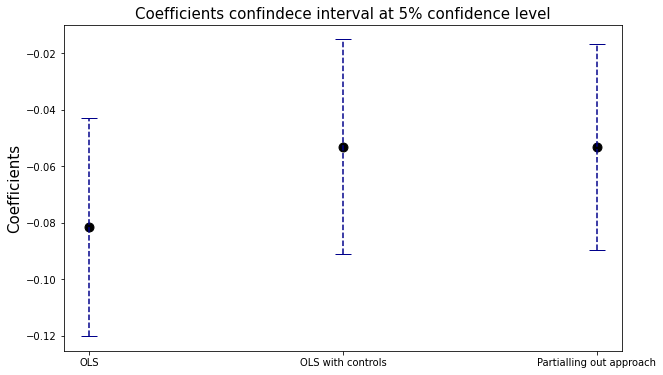

In [23]:
table3_pandas['errors'] = table3_pandas['Estimate'] - table3_pandas['Lower_bound']

# Define figure, axes, and plot
fig, ax = plt.subplots(figsize=(10, 6))
    
    
   # Coefficients
ax.scatter(x=pd.np.arange(table3_pandas.shape[0]), 
         marker='o', s=80, 
         y=table3_pandas['Estimate'], color='black')

# Error bars for 95% confidence interval
# Can increase capsize to add whiskers
eb1 = plt.errorbar(x=table3_pandas["Model"], y=table3_pandas['Estimate'],
            yerr=table3_pandas['errors'], color = 'darkblue', ls='', capsize = 8)

eb1[-1][0].set_linestyle('--')
    
# Set title & labels
plt.title('Coefficients confindece interval at 5% confidence level',fontsize=15)
ax.set_ylabel('Coefficients',fontsize=15)
ax.set_xlabel('',fontsize=22)

    
plt.show()

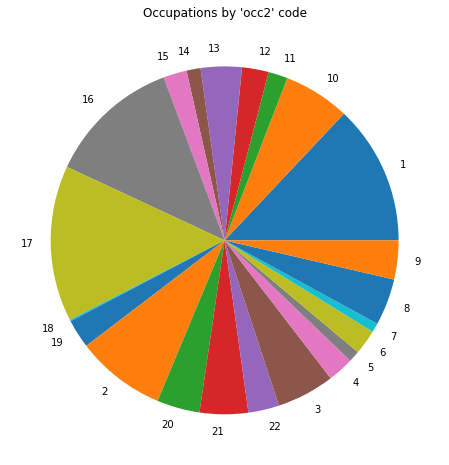

In [24]:
#Pie graph for occupations

ocupacion = subset.groupby('occ2').size()

ocupacion.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Occupations by 'occ2' code")
plt.ylabel("")
plt.show()

<AxesSubplot:xlabel='lwage', ylabel='Count'>

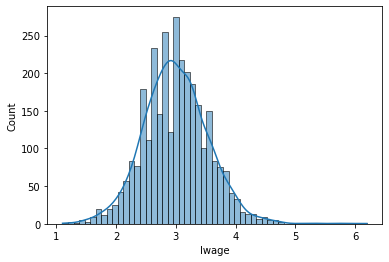

In [25]:
#histogram for ln(salary) distribution

sns.histplot(data=subset, x="lwage", kde=True)

<AxesSubplot:xlabel='lwage', ylabel='Density'>

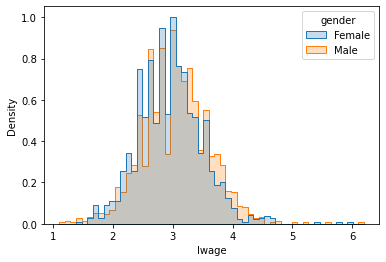

In [26]:
#density histogram for lwage by gender

sns.histplot(
    subset, x="lwage", hue="gender", element="step",
    stat="density", common_norm=False,
)

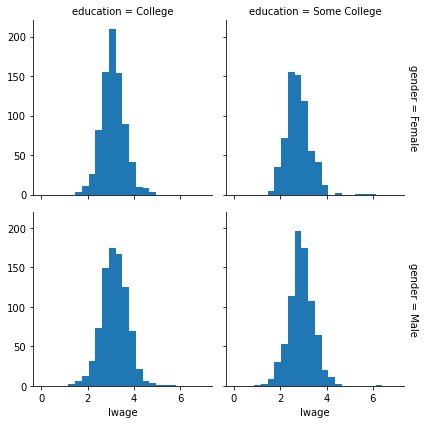

In [27]:
#histogram by educational level and gender

figure1 = sns.FacetGrid(subset, col="education", row="gender", margin_titles=True)
figure1.map(plt.hist, 'lwage', bins=np.linspace(0, 7, 25))


Text(0, 0.5, 'Log hourly wage')

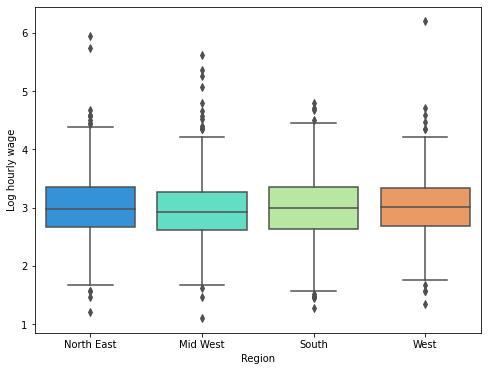

In [28]:
#boxplot lwage by region

fig, ax = plt.subplots(figsize=(8,6))

box = sns.boxplot(x="region", y="lwage", data=subset  ,palette='rainbow')
plt.xlabel('Region')
plt.ylabel('Log hourly wage')



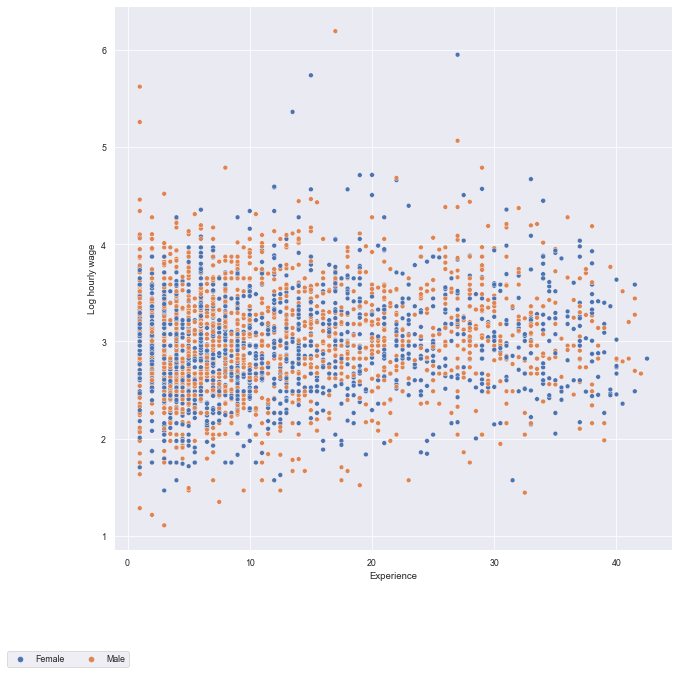

In [29]:
#Scatter: experience -> ln(wage) by sex
sns.set('paper')
plt.figure(figsize=(10, 10))
plot = sns.scatterplot(data=subset, x="exp1", y="lwage", hue="gender", palette="deep")

plt.xlabel('Experience')
plt.ylabel('Log hourly wage')

plot.legend(loc='center left', bbox_to_anchor=(-0.2, -0.2), ncol=3)

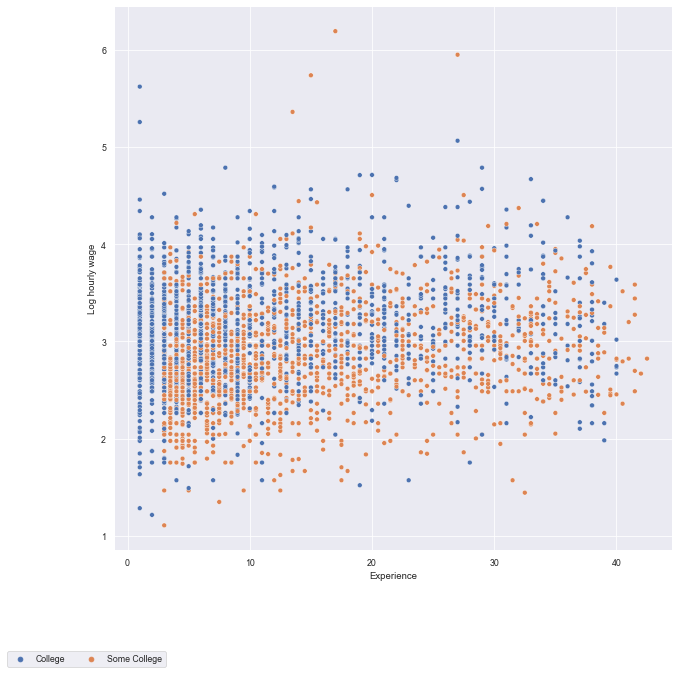

In [30]:
#Scatter: experience -> ln(wage) by education
sns.set('paper')
plt.figure(figsize=(10, 10))
plot = sns.scatterplot(data=subset, x="exp1", y="lwage", hue="education", palette="deep")

plt.xlabel('Experience')
plt.ylabel('Log hourly wage')

plot.legend(loc='center left', bbox_to_anchor=(-0.2, -0.2), ncol=3)

### Replicate the paper's graph


C:\Users\Alvaro\AppData\Local\Temp/ipykernel_14568/2647478186.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(x=subset[data['scl']==1].exp1,y=subset[subset['scl']==1].lwage,estimator=np.mean,color='r',ci=None)
C:\Users\Alvaro\AppData\Local\Temp/ipykernel_14568/2647478186.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.regplot(x=subset[data['scl']==1].exp1,y=subset[subset['scl']==1].lwage,


<function matplotlib.pyplot.show(close=None, block=None)>

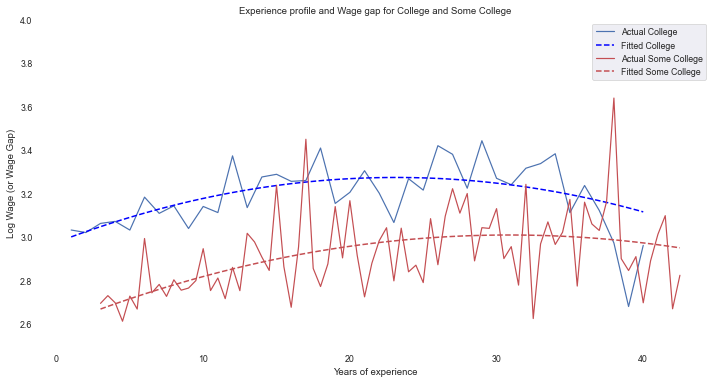

In [33]:
#size of graph
plt.figure(figsize=(12,6))

#insert the content of the graph (lineal) for college educated
ax=sns.lineplot(x=subset[subset['clg']==1].exp1,y=subset[subset['clg']==1].lwage,estimator=np.mean,color='b',ci=None)
sns.regplot(x=subset[subset['clg']==1].exp1,y=subset[subset['clg']==1].lwage,
            color='blue',scatter=False,order=2,x_jitter=.001,x_estimator=np.mean,fit_reg=True,ci=None,line_kws={'lw':1.5})
#content for some college educated
sns.lineplot(x=subset[data['scl']==1].exp1,y=subset[subset['scl']==1].lwage,estimator=np.mean,color='r',ci=None)
sns.regplot(x=subset[data['scl']==1].exp1,y=subset[subset['scl']==1].lwage,
            color='r',scatter=False,order=2,x_jitter=.001,x_estimator=np.mean,fit_reg=True,ci=None,line_kws={'lw':1.5})

#configurate the aspect of the graph
ax.set(ylim=(2.5, 4))

ax.lines[1].set_linestyle("--")
ax.lines[3].set_linestyle("--")
plt.xlabel('Years of experience')
plt.ylabel('Log Wage (or Wage Gap)')
plt.title('Experience profile and Wage gap for College and Some College')
plt.legend(['Actual College','Fitted College','Actual Some College','Fitted Some College'])
ax.set(facecolor = "white")
plt.grid(visible='True', which='major', axis='both')
plt.show
##falta ejes visibles!!

### Proof of the Frisch-Waugh-Lovell Theorem

We got the model as:

$$Y = D{\beta_1} + W{\beta_2} +e$$

where $\beta_1$ is the coefficient of interest.

Using the Frisch-Waugh-Lovell Theorem it is possible to obtain the estimator for $\beta_1$, by a partialling-out regression model as:

$$Y = {\gamma_{YW}}W  +{e_1}$$
$$D = {\gamma_{DW}}W  +{e_2}$$

After aplly a OLS regression, we get the residual error from both models and obtain the residual matrix:

$$\hat{e_1} = Y - W{\gamma_{YW}} $$
$$ = Y - W(W'W)^{-1} W'Y $$
$$ = (I -  W(W'W)^{-1} W') Y $$
$$ = MY $$

$$\hat{e_2} = D - W{\gamma_{DW}} $$
$$ = D - W(W'W)^{-1} W'D $$
$$ = (I -  W(W'W)^{-1} W') D $$
$$ = MD $$

Where $M$ is a idempotent matrix, regress the residuals to obtain $\beta_1$ :
$$\hat{e_1} = \hat{e_2} + B_{\hat{e_1}\hat{e_2}} + e_3$$

Then: 
$$B_{\hat{e_1}\hat{e_2}} = \beta_1$$
